In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading data
DATA_PATH = "../data/"

mall = pd.read_csv(f'{DATA_PATH}mall_v1.csv')
store = pd.read_csv(f'{DATA_PATH}store_v1.csv')
cost = pd.read_csv(f'{DATA_PATH}cost_v1.csv')
traffic_store = pd.read_csv(f'{DATA_PATH}people_flow_v1.csv')
traffic_mall = pd.read_csv(f'{DATA_PATH}mall_traffic.csv')
ref_traffic = pd.read_csv(f'{DATA_PATH}referenciel_traffic_v1.csv')
dwell_time = pd.read_csv(f'{DATA_PATH}dwell_time_v1.csv')

In [3]:
# Merging all dataframes to conduct analyses
traffic_store_final = pd.merge(left=ref_traffic, right=traffic_store, on=["block_id", "external_mall_id"])
traffic_store_final = pd.merge(left=dwell_time, right=traffic_store_final, on=["block_id", "external_mall_id"])

store_final = pd.merge(left=store, right=traffic_store_final, on="store_id")
store_final = pd.merge(left=store_final, right=mall, on="mall_id")

cost["store_id"] = cost["store_id"].fillna(0)
cost["store_id"] = cost["store_id"].astype(int)

store_final = pd.merge(left=store_final, right=cost, on="store_id")
store_final = pd.merge(left=store_final, right=traffic_mall, on="external_mall_id")

In [4]:
store_final.head()

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,...,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m,visits_in_monthly_average,visits_out_monthly_average,visits_in_daily_average,visits_out_daily_average,total_visits_in,total_visits_out,avg_dwell_time
0,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,...,NaN,424.0,NaN,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
1,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,...,12361.0,NaN,42319.0,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
2,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,...,NaN,NaN,NaN,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
3,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,...,414791.0,NaN,NaN,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
4,store_5,5,0,23/10/1990,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,340042.0,78000.0,...,NaN,NaN,335361.0,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88


In [5]:
store_final = store_final.drop(columns=['external_mall_id', 'block_id'])

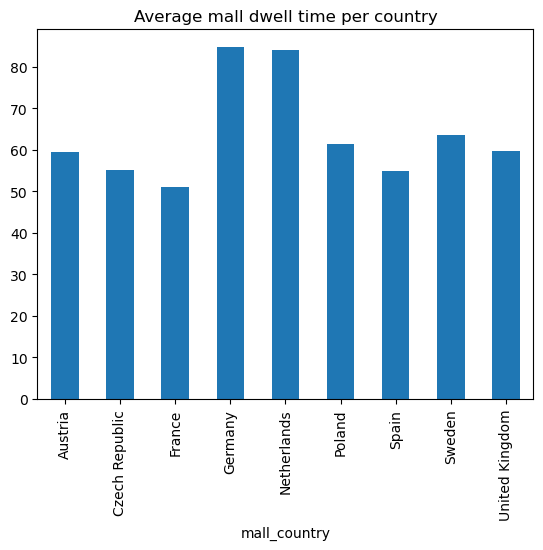

In [6]:
store_final.groupby("mall_country").mean("avg_dwell_time")["avg_dwell_time"].plot(kind='bar', title="Average mall dwell time per country")
plt.show()

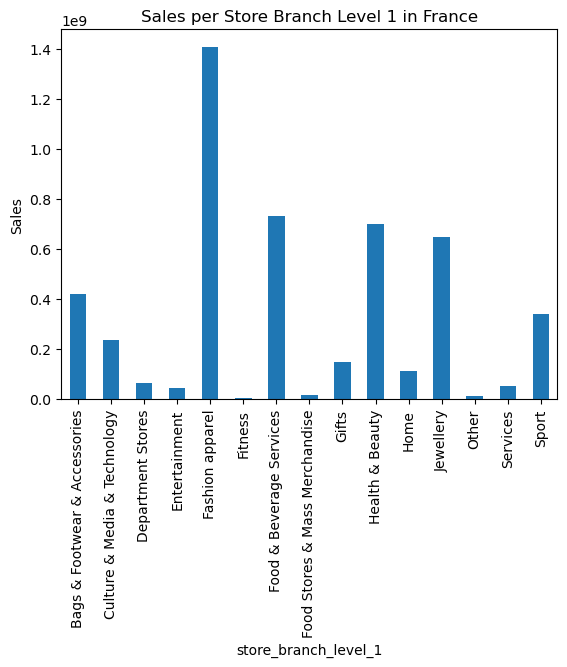

In [8]:
# Filter the data for France
store_final_france = store_final[store_final['mall_country'] == 'France']

# Group by store branch level 1 and sum the sales
sales_per_branch = store_final_france.groupby('store_branch_level_1')['store_sales_r12m'].sum()

# Plot the sales per store branch level 1
sales_per_branch.plot(kind='bar', title='Sales per Store Branch Level 1 in France')
plt.ylabel('Sales')
plt.show()

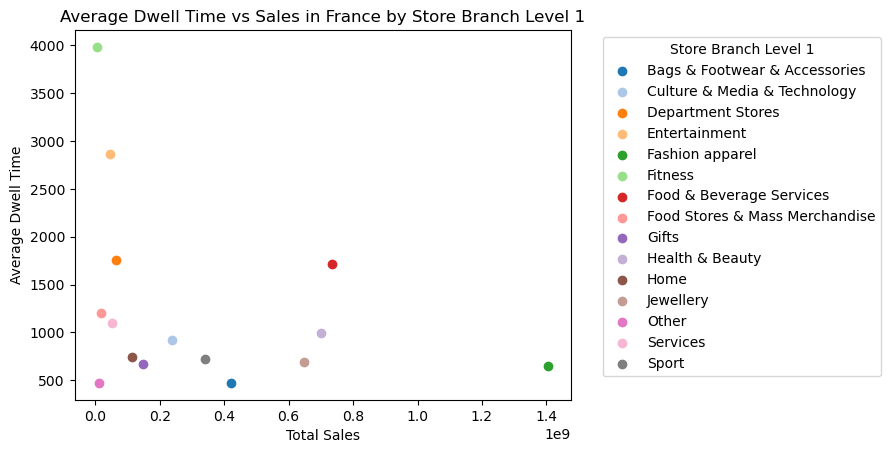

In [13]:
# Calculate the average dwell time and total sales per store branch level 1 in France
avg_dwell_time_sales = store_final_france.groupby('store_branch_level_1').agg({
    'average_dwell_time': 'mean',
    'store_sales_r12m': 'sum'
})

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_dwell_time_sales.index)}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = avg_dwell_time_sales.loc[category]
    ax.scatter(data['store_sales_r12m'], data['average_dwell_time'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Average Dwell Time vs Sales in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Average Dwell Time')
plt.show()


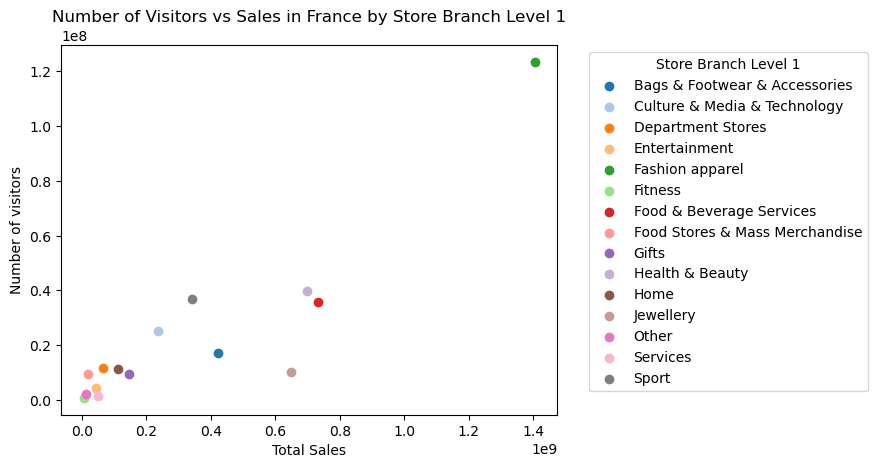

In [14]:
# Calculate the average traffic and total sales per store branch level 1 in France
avg_traffic_sales = store_final_france.groupby('store_branch_level_1').agg({
    'store_total_visits': 'sum',
    'store_sales_r12m': 'sum'
})

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_traffic_sales.index)}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = avg_traffic_sales.loc[category]
    ax.scatter(data['store_sales_r12m'], data['store_total_visits'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Number of Visitors vs Sales in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Number of visitors')
plt.show()


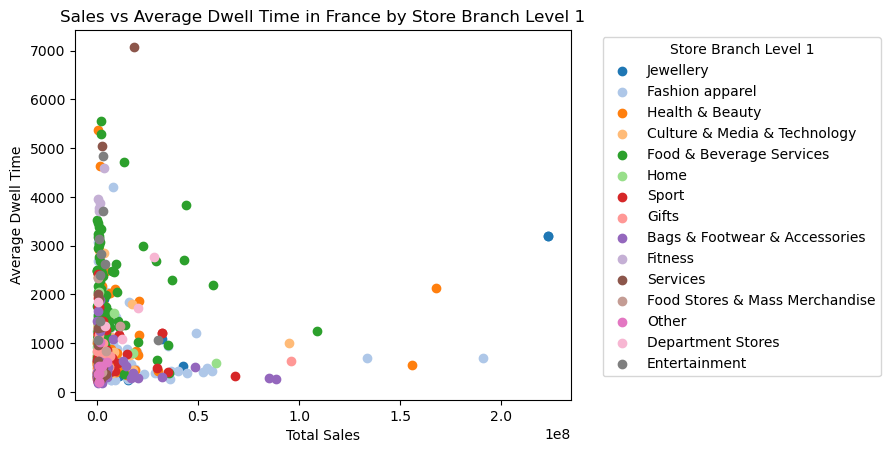

In [15]:
# Filter the data for France
store_final_france = store_final[store_final['mall_country'] == 'France']

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(store_final_france['store_branch_level_1'].unique())}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = store_final_france[store_final_france['store_branch_level_1'] == category]
    ax.scatter(data['store_sales_r12m'], data['average_dwell_time'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Average Dwell Time in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Average Dwell Time')
plt.show()

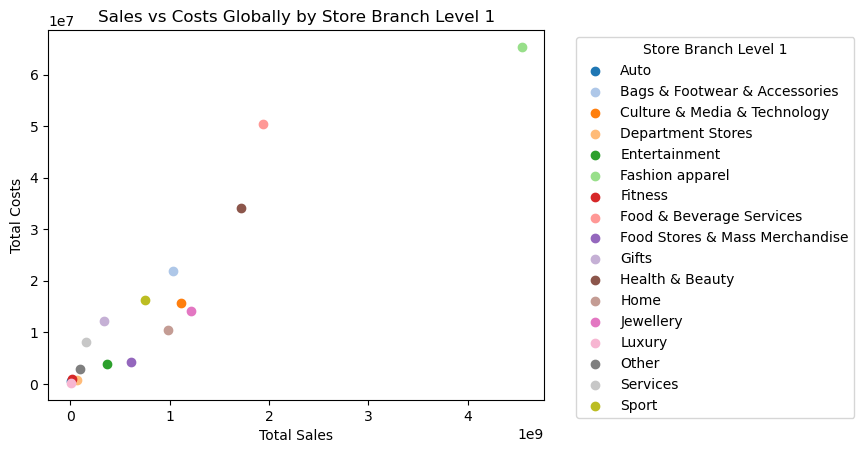

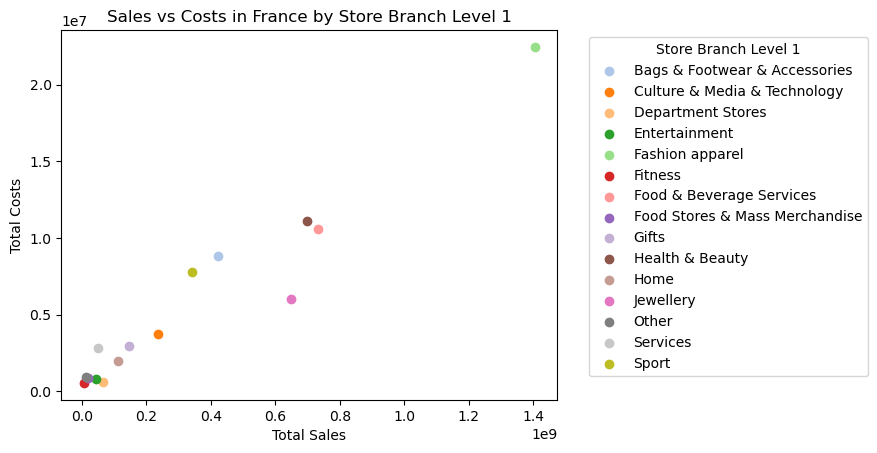

In [28]:
# Calculate total sales and total costs per store branch level 1 globally
global_sales_costs = store_final.groupby('store_branch_level_1').agg({
    'store_sales_r12m': 'sum',
    'service_charges_r12m': 'sum',
    'marketing_costs_r12m': 'sum',
    'administration_fees_r12m': 'sum',
    'real_estate_taxes_r12m': 'sum',
    'large_scale_works_r12m': 'sum',
    'maintenance_works_r12m': 'sum',
    'store_rent_r12m': 'sum'
})

# Sum all costs columns to get total costs
global_sales_costs['total_costs'] = global_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum(axis=1)

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(global_sales_costs.index)}

# Plot sales vs costs globally
fig, ax = plt.subplots()
for category, color in colors.items():
    data = global_sales_costs.loc[category]
    ax.scatter(data['store_sales_r12m'], data['total_costs'], label=category, color=color)
    # ax.annotate(category, (data['store_sales_r12m'], data['total_costs']), fontsize=8)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Costs Globally by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Costs')
plt.show()

# Calculate total sales and total costs per store branch level 1 in France
france_sales_costs = store_final_france.groupby('store_branch_level_1').agg({
    'store_sales_r12m': 'sum',
    'service_charges_r12m': 'sum',
    'marketing_costs_r12m': 'sum',
    'administration_fees_r12m': 'sum',
    'real_estate_taxes_r12m': 'sum',
    'large_scale_works_r12m': 'sum',
    'maintenance_works_r12m': 'sum',
    'store_rent_r12m': 'sum'
})

# Sum all costs columns to get total costs
france_sales_costs['total_costs'] = france_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum(axis=1)

# Plot sales vs costs in France
fig, ax = plt.subplots()
for category, color in colors.items():
    if category in france_sales_costs.index:
        data = france_sales_costs.loc[category]
        ax.scatter(data['store_sales_r12m'], data['total_costs'], label=category, color=color)
        # ax.annotate(category, (data['store_sales_r12m'], data['total_costs']), fontsize=8)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Costs in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Costs')
plt.show()

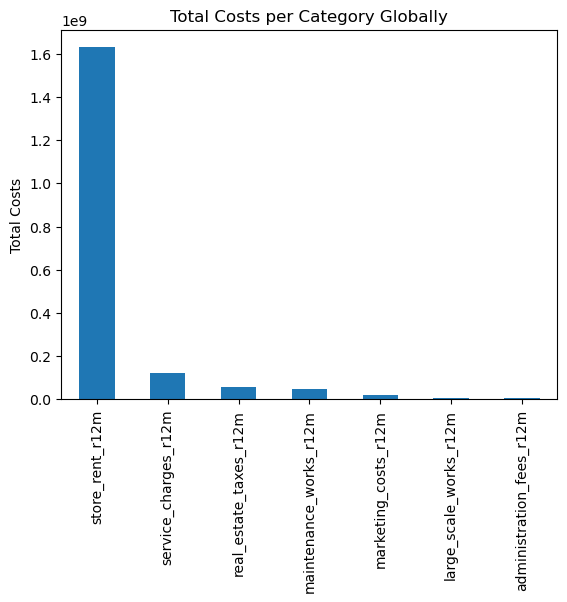

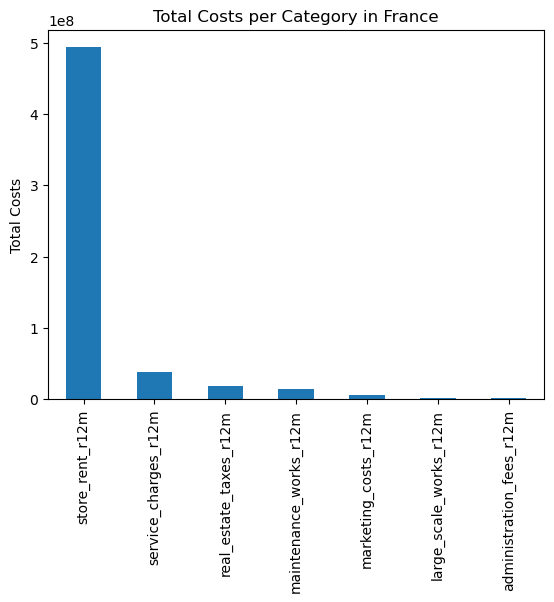

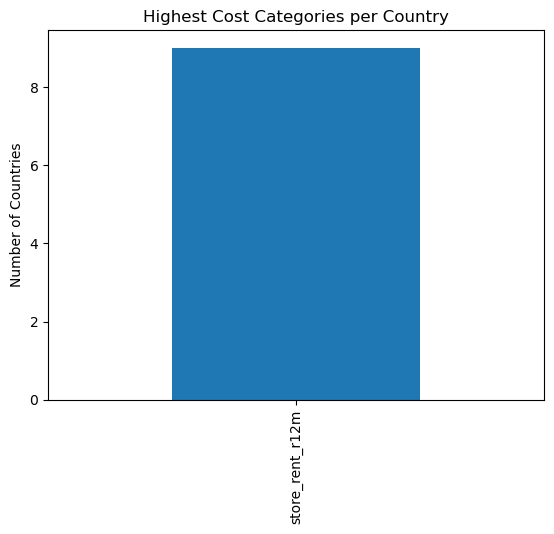

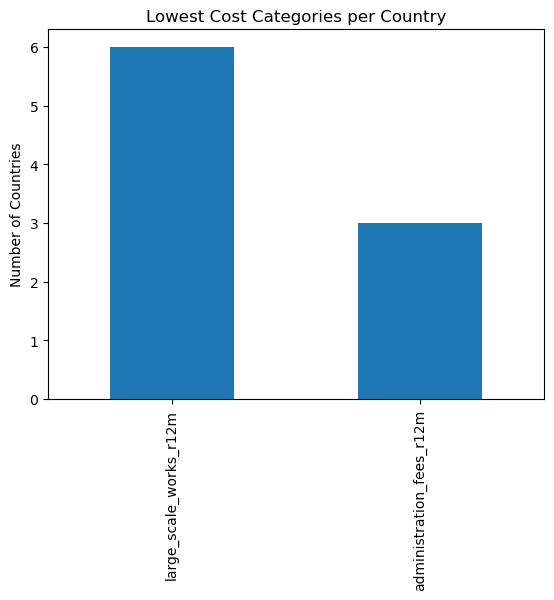

In [29]:
# Calculate the total costs per category globally
global_costs = global_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'store_rent_r12m']].sum().sort_values(ascending=False)

# Plot the total costs per category globally
global_costs.plot(kind='bar', title='Total Costs per Category Globally')
plt.ylabel('Total Costs')
plt.show()

# Calculate the total costs per category in France
france_costs = france_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'store_rent_r12m']].sum().sort_values(ascending=False)

# Plot the total costs per category in France
france_costs.plot(kind='bar', title='Total Costs per Category in France')
plt.ylabel('Total Costs')
plt.show()

# Calculate the highest and lowest cost categories per country
highest_costs_per_country = store_final.groupby('mall_country')[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'store_rent_r12m']].sum().idxmax(axis=1)
lowest_costs_per_country = store_final.groupby('mall_country')[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'store_rent_r12m']].sum().idxmin(axis=1)

# Plot the highest cost categories per country
highest_costs_per_country.value_counts().plot(kind='bar', title='Highest Cost Categories per Country')
plt.ylabel('Number of Countries')
plt.show()

# Plot the lowest cost categories per country
lowest_costs_per_country.value_counts().plot(kind='bar', title='Lowest Cost Categories per Country')
plt.ylabel('Number of Countries')
plt.show()

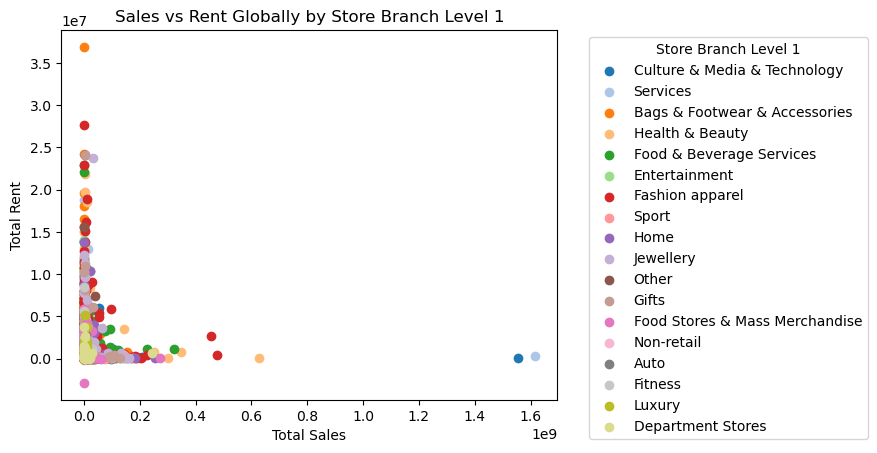

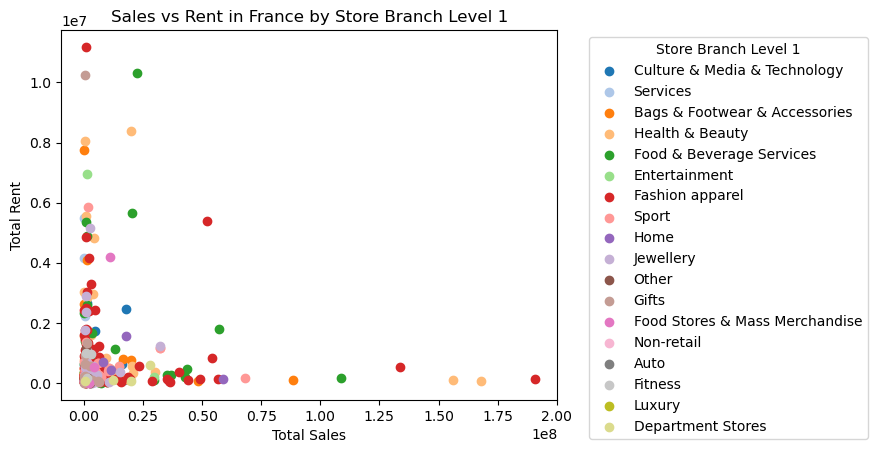

In [30]:
# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(store['store_branch_level_1'].unique())}

# Plot the scatter plot globally
fig, ax = plt.subplots()
for category, color in colors.items():
    data = store[store['store_branch_level_1'] == category]
    ax.scatter(data['store_sales_r12m'], data['store_rent_r12m'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Rent Globally by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Rent')
plt.show()

# Filter the data for France
store_france = store_final[store_final['mall_country'] == 'France']

# Plot the scatter plot for France
fig, ax = plt.subplots()
for category, color in colors.items():
    data = store_france[store_france['store_branch_level_1'] == category]
    ax.scatter(data['store_sales_r12m'], data['store_rent_r12m'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Rent in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Rent')
plt.show()

In [22]:
store

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,store_area
0,store_0,0,0,01/01/1999,31/08/2023,Culture & Media & Technology,Mobile Phones & Communication,Mobile Phones & Communication & Internet,8058961.0,52824.0,0.00
1,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,89.00
2,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,115.00
3,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,81.00
4,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,59.00
...,...,...,...,...,...,...,...,...,...,...,...
15546,store_5866,15546,85,15/09/2023,NaN,Food & Beverage Services,"Bars, Coffee and Tea breaks",Seated Cafes & Kiosks,141430.0,92820.0,181.63
15547,store_5867,15547,85,12/05/2024,NaN,Food & Beverage Services,Sweet moments,Icecreams & Frozen yogurts,292239.0,1077736.0,30.94
15548,store_5868,15548,85,03/06/2024,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,NaN,NaN,86.12
15549,store_5869,15549,85,01/03/2024,NaN,Health & Beauty,"Perfumery, beautycare",Multibrand mainstream,13334056.0,203089.0,39.58


In [80]:
store_final.columns

Index(['store_name', 'store_id', 'mall_id', 'store_year_opened',
       'store_year_closed', 'store_branch_level_1', 'store_branch_level_2',
       'store_branch_level_3', 'store_sales_r12m', 'store_rent_r12m',
       'store_area', 'external_mall_id', 'block_id', 'average_dwell_time',
       'median_dwell_time', 'store_visits_monthly_average',
       'store_window_flow_monthly_average', 'store_visits_daily_average',
       'store_window_flow_daily_average', 'store_total_visits',
       'store_total_window_flow', 'days_with_traffic_data', 'mall_name',
       'mall_country', 'total_mall_area', 'rent_incentive_r12m',
       'service_charges_r12m', 'marketing_costs_r12m',
       'administration_fees_r12m', 'real_estate_taxes_r12m',
       'large_scale_works_r12m', 'maintenance_works_r12m',
       'visits_in_monthly_average', 'visits_out_monthly_average',
       'visits_in_daily_average', 'visits_out_daily_average',
       'total_visits_in', 'total_visits_out', 'avg_dwell_time'],
      dtyp

In [16]:
cost

,store_id,rent_incentive_r12m,service_charges_r12m,marketing_costs_r12m,administration_fees_r12m,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m
0,0,NaN,16197.0,10101.0,NaN,NaN,NaN,NaN
1,55,NaN,NaN,14420.0,NaN,NaN,652.0,NaN
2,259,NaN,NaN,2424.0,NaN,NaN,3481.0,44779.0
3,226,NaN,511.0,47797.0,NaN,3452.0,NaN,NaN
4,104,NaN,6509.0,2469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
14650,15517,NaN,15580.0,0.0,NaN,NaN,NaN,NaN
14651,15505,NaN,NaN,0.0,7947.0,NaN,NaN,NaN
14652,15506,NaN,NaN,0.0,NaN,9598.0,NaN,NaN
14653,15540,NaN,73503.0,0.0,NaN,NaN,NaN,NaN
